## 7.2.1 构建数据集

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import torch
from torchvision import datasets
from torchvision import transforms

In [26]:
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False, transform=transforms.ToTensor())

In [31]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
           for img, label in cifar10
           if label in [0, 2]]
cifar2_val = [(img, label_map[label])
           for img, label in cifar10_val
           if label in [0, 2]]
label_map

{0: 0, 2: 1}

## 7.2.2 一个全连接模型

In [4]:
import torch.nn as nn

In [5]:
n_out = 2
model = nn.Sequential(nn.Linear(3072, 512),
                     nn.Tanh(),
                     nn.Linear(512, n_out))

## 7.2.4 用概率表示输出

In [6]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [7]:
x = torch.tensor([1., 2., 3.])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [8]:
softmax(x).sum()

tensor(1.)

In [9]:
softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0],
                [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [10]:
model = nn.Sequential(nn.Linear(3072, 512),
                     nn.Tanh(),
                     nn.Linear(512, n_out),
                     nn.Softmax(dim=1))

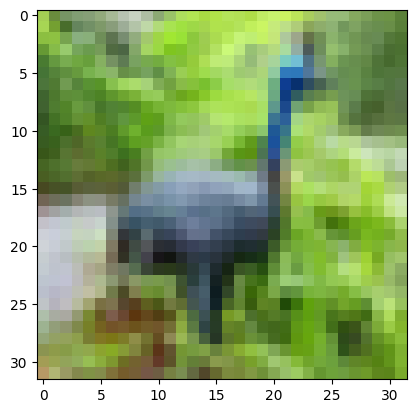

In [11]:
img, _ = cifar2[0]
# to_tensor = transforms.ToTensor()
# img_t = to_tensor(img)
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [12]:
img_batch = img.view(-1).unsqueeze(0)
img_batch.shape

torch.Size([1, 3072])

In [13]:
out = model(img_batch)
out

tensor([[0.5770, 0.4230]], grad_fn=<SoftmaxBackward0>)

In [14]:
_, index = torch.max(out, dim=1)
index

tensor([0])

## 7.2.5 分类的损失

In [15]:
model = nn.Sequential(nn.Linear(3072, 512),
                     nn.Tanh(),
                     nn.Linear(512, n_out),
                     nn.LogSoftmax(dim=1))
loss = nn.NLLLoss()

In [16]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label])), out.shape

(tensor(0.5866, grad_fn=<NllLossBackward0>), torch.Size([1, 2]))

## 7.2.6 训练分类器

In [17]:
import torch.optim as optim

In [57]:
n_epoch = 100
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
for epoch in range(n_epoch):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch}, Loss {float(loss)}")

Epoch 0, Loss 1.1925745010375977
Epoch 1, Loss 1.5476430654525757
Epoch 2, Loss 1.8626878261566162
Epoch 3, Loss 2.264798879623413
Epoch 4, Loss 2.7325148582458496
Epoch 5, Loss 3.1632604598999023
Epoch 6, Loss 3.8141212463378906
Epoch 7, Loss 3.9412786960601807
Epoch 8, Loss 4.225193977355957
Epoch 9, Loss 4.067154407501221
Epoch 10, Loss 5.04037618637085
Epoch 11, Loss 6.164716720581055
Epoch 12, Loss 7.250151634216309
Epoch 13, Loss 6.8474345207214355
Epoch 14, Loss 8.820053100585938
Epoch 15, Loss 9.511470794677734
Epoch 16, Loss 9.342307090759277
Epoch 17, Loss 6.686764240264893
Epoch 18, Loss 4.750807762145996
Epoch 19, Loss 6.631525039672852
Epoch 20, Loss 4.963881492614746
Epoch 21, Loss 4.3386640548706055
Epoch 22, Loss 11.273807525634766
Epoch 23, Loss 10.440705299377441
Epoch 24, Loss 6.962867259979248
Epoch 25, Loss 3.253070592880249
Epoch 26, Loss 3.024091958999634
Epoch 27, Loss 4.405821323394775
Epoch 28, Loss 12.198453903198242
Epoch 29, Loss 6.029188632965088
Epoch 30,

In [18]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [19]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

n_epoch = 100
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
for epoch in range(n_epoch):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch}, Loss {float(loss)}")

Epoch 0, Loss 0.527211606502533
Epoch 1, Loss 0.41103312373161316
Epoch 2, Loss 0.5519788861274719
Epoch 3, Loss 0.35616472363471985
Epoch 4, Loss 0.5757941007614136
Epoch 5, Loss 0.46731072664260864
Epoch 6, Loss 0.7799959778785706
Epoch 7, Loss 0.6500215530395508
Epoch 8, Loss 0.3477533161640167
Epoch 9, Loss 0.2894394099712372
Epoch 10, Loss 0.2796080410480499
Epoch 11, Loss 0.2694486379623413
Epoch 12, Loss 0.3115825355052948
Epoch 13, Loss 0.8182613253593445
Epoch 14, Loss 0.34174850583076477
Epoch 15, Loss 0.601434051990509
Epoch 16, Loss 0.3063657879829407
Epoch 17, Loss 0.7163041234016418
Epoch 18, Loss 0.5639424324035645
Epoch 19, Loss 0.5650554895401001
Epoch 20, Loss 0.5877654552459717
Epoch 21, Loss 0.33306440711021423
Epoch 22, Loss 0.3867652714252472
Epoch 23, Loss 0.3494334816932678
Epoch 24, Loss 0.26195791363716125
Epoch 25, Loss 0.4876689612865448
Epoch 26, Loss 0.26840662956237793
Epoch 27, Loss 0.5191590785980225
Epoch 28, Loss 0.30960193276405334
Epoch 29, Loss 0.3

In [55]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))  # torch.Size([64, 2])
        _, predicted = torch.max(outputs, dim=1)  # torch.Size([64])
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print(total)
print(f"Accuracy: {float(correct / total)}")

2000
Accuracy: 0.749


In [51]:
model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

for epoch in range(n_epoch):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch}, Loss {loss}")

Epoch 0, Loss 0.5679410696029663
Epoch 1, Loss 0.5021273493766785
Epoch 2, Loss 0.41848742961883545
Epoch 3, Loss 0.5012954473495483
Epoch 4, Loss 0.6795152425765991
Epoch 5, Loss 0.6311497092247009
Epoch 6, Loss 0.3957945704460144
Epoch 7, Loss 0.2866017818450928
Epoch 8, Loss 0.48903101682662964
Epoch 9, Loss 0.3663298189640045
Epoch 10, Loss 0.5883415341377258
Epoch 11, Loss 0.44536450505256653
Epoch 12, Loss 0.5720992684364319
Epoch 13, Loss 0.5167372226715088
Epoch 14, Loss 0.6821191906929016
Epoch 15, Loss 0.5667896270751953
Epoch 16, Loss 0.2975349426269531
Epoch 17, Loss 0.5554006695747375
Epoch 18, Loss 0.2388610988855362
Epoch 19, Loss 0.6179236173629761
Epoch 20, Loss 0.647311806678772
Epoch 21, Loss 0.25633323192596436
Epoch 22, Loss 0.5858343839645386
Epoch 23, Loss 0.4304242730140686
Epoch 24, Loss 0.6274289488792419
Epoch 25, Loss 0.40199175477027893
Epoch 26, Loss 0.4516570568084717
Epoch 27, Loss 0.19547374546527863
Epoch 28, Loss 0.36537468433380127
Epoch 29, Loss 0.2

In [56]:
total = 0
correct = 0

val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
with torch.no_grad():
    for imgs, labels in train_loader:
        total += imgs.shape[0]
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        correct += int((predicted == labels).sum())
    print(f"Accuracy: {float(correct / total)}")

Accuracy: 0.755


In [58]:
numel_list = [p.numel()
             for p in model.parameters()
             if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])